<a href="https://colab.research.google.com/github/danikayoung16/MAT421/blob/main/ModuleD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Module D: Section 1.1, 1.2, 1.3, 1.4

Danika Young


# Linear Algebra Concepts

## Linear Space

A **linear space (vector space)** is a set of vectors that can be added together and scaled by real numbers (scalars). A vector space must satisfy these properties:

1. **Closure under addition**: The sum of any two vectors in the space is also in the space.
2. **Closure under scalar multiplication**: Multiplying any vector by a scalar results in another vector in the space.
3. **Existence of zero vector**: There is a special vector (zero vector) that, when added to any vector, leaves it unchanged.
4. **Existence of additive inverses**: Each vector has an inverse that, when added to the original, results in the zero vector.

For example, **R²** (the two-dimensional plane) is a vector space because it satisfies these properties.



In [1]:
import numpy as np

# Define two vectors
v1 = np.array([1, 2])
v2 = np.array([3, 4])

# Scalar multiplication and vector addition
alpha = 2
beta = -1
linear_combination = alpha * v1 + beta * v2

print("Vector 1:", v1)
print("Vector 2:", v2)
print("Linear Combination (2*v1 - 1*v2):", linear_combination)


Vector 1: [1 2]
Vector 2: [3 4]
Linear Combination (2*v1 - 1*v2): [-1  0]


In [5]:
import numpy as np

# Define a set of vectors in R^3
v1 = np.array([1, 2, 3])
v2 = np.array([4, 5, 6])
v3 = np.array([7, 8, 9])

# Stack them into a matrix
V = np.vstack([v1, v2, v3])

# Compute the rank of the matrix
rank = np.linalg.matrix_rank(V)

print("Matrix formed by vectors:\n", V)
print("Rank of the matrix:", rank)

# If rank is 3 (full rank), the vectors span R^3
if rank == 3:
    print("These vectors span R^3.")
else:
    print("These vectors do NOT span R^3.")


Matrix formed by vectors:
 [[1 2 3]
 [4 5 6]
 [7 8 9]]
Rank of the matrix: 2
These vectors do NOT span R^3.


## Orthogonality

**Orthogonality** refers to the relationship between two vectors when their dot product is zero. If two vectors **v** and **w** are orthogonal, they are **perpendicular** in space.

The dot product of two vectors **v** and **w** is given by:

$
v \cdot w = v_1w_1 + v_2w_2 + \dots + v_nw_n
$

If $ v \cdot w = 0 $, then the vectors are orthogonal.


**Example:**  
In **R²**, the vectors **(1,0)** and **(0,1)** are orthogonal because:

$
(1,0) \cdot (0,1) = 1(0) + 0(1) = 0
$

This means the vectors are at a **90-degree angle** to each other.

In [2]:
# Define two orthogonal vectors
v1 = np.array([1, 0])
v2 = np.array([0, 1])

# Compute dot product
dot_product = np.dot(v1, v2)

print("Dot product of v1 and v2:", dot_product)  # Should be 0


Dot product of v1 and v2: 0


In [6]:
def gram_schmidt(vectors):
    """Applies Gram-Schmidt process to obtain an orthonormal basis."""
    orthonormal_basis = []
    for v in vectors:
        w = v - sum(np.dot(v, b) * b for b in orthonormal_basis)  # Projection subtraction
        w = w / np.linalg.norm(w)  # Normalize
        orthonormal_basis.append(w)
    return np.array(orthonormal_basis)

# Define a set of linearly independent vectors in R^3
vectors = np.array([
    [1, 1, 0],
    [1, 0, 1],
    [0, 1, 1]
])

# Apply Gram-Schmidt process
orthonormal_vectors = gram_schmidt(vectors)

print("Original Vectors:\n", vectors)
print("Orthonormal Basis:\n", orthonormal_vectors)

# Verify orthogonality (dot product should be zero)
dot_products = np.dot(orthonormal_vectors, orthonormal_vectors.T)
print("Dot Product Matrix (Should be Identity):\n", dot_products)


Original Vectors:
 [[1 1 0]
 [1 0 1]
 [0 1 1]]
Orthonormal Basis:
 [[ 0.70710678  0.70710678  0.        ]
 [ 0.40824829 -0.40824829  0.81649658]
 [-0.57735027  0.57735027  0.57735027]]
Dot Product Matrix (Should be Identity):
 [[ 1.00000000e+00  1.03018891e-16  1.51811967e-16]
 [ 1.03018891e-16  1.00000000e+00 -1.59104334e-16]
 [ 1.51811967e-16 -1.59104334e-16  1.00000000e+00]]


## Eigenvalues & Eigenvectors

**Eigenvalues** and **eigenvectors** are fundamental in linear algebra and are used in many applications, including **machine learning, physics, and engineering**.

For a **square matrix** $A$, the **eigenvalues** $lambda$ and **eigenvectors** $ v $ satisfy the equation:

$
A v = \lambda v
$

Where:
- $A $ is an **n × n matrix**.
- $ v $ is an **eigenvector** (a nonzero vector that does not change direction under transformation).
- $lambda$ is the **eigenvalue** (a scalar that represents how much the eigenvector is stretched or compressed).

Eigenvalues provide insight into **stability, transformations, and dimensionality reduction** (like **Principal Component Analysis (PCA)**).

**Example:**  
If matrix $A$ represents a transformation, the eigenvectors are the directions that remain unchanged, and eigenvalues indicate the scaling factor.


In [3]:
# Define a matrix
A = np.array([[4, -2],
              [1,  1]])

# Compute eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(A)

print("Eigenvalues:", eigenvalues)
print("Eigenvectors:\n", eigenvectors)


Eigenvalues: [3. 2.]
Eigenvectors:
 [[0.89442719 0.70710678]
 [0.4472136  0.70710678]]


In [7]:
# Define a square matrix
A = np.array([[6, 2, 1],
              [2, 3, 1],
              [1, 1, 1]])

# Compute eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(A)

print("Eigenvalues:\n", eigenvalues)
print("Eigenvectors:\n", eigenvectors)

# Verify Eigen decomposition: A = VΛV^(-1)
V = eigenvectors  # Eigenvectors matrix
Λ = np.diag(eigenvalues)  # Diagonal matrix of eigenvalues
V_inv = np.linalg.inv(V)  # Inverse of eigenvectors matrix

A_reconstructed = V @ Λ @ V_inv  # Eigen decomposition formula
print("Reconstructed A:\n", A_reconstructed)


Eigenvalues:
 [7.28799214 2.13307448 0.57893339]
Eigenvectors:
 [[ 0.86643225  0.49742503 -0.0431682 ]
 [ 0.45305757 -0.8195891  -0.35073145]
 [ 0.20984279 -0.28432735  0.9354806 ]]
Reconstructed A:
 [[6. 2. 1.]
 [2. 3. 1.]
 [1. 1. 1.]]


## Linear Regression

**Linear regression** is a statistical method used to model the relationship between a dependent variable (**y**) and one or more independent variables (**X**). The goal is to find a **best-fit line** that minimizes errors.

The equation of a simple linear regression model is:

$
y = mx + b
$

Where:
- $ m$ = **slope** - rate of change of $y $ with respect to $X $
- $b $ = **intercept** - value of  $y $ when $ X = 0 $
- $ X $ = **independent variable (input)**
- $ y $ = **dependent variable (output)**


Steps in Linear Regression:



1.  Collect data points $(X, y)$.
2.  Fit a best-fit line by minimizing the sum of squared differences between predicted and actual values.
3. Use the model to make predictions.



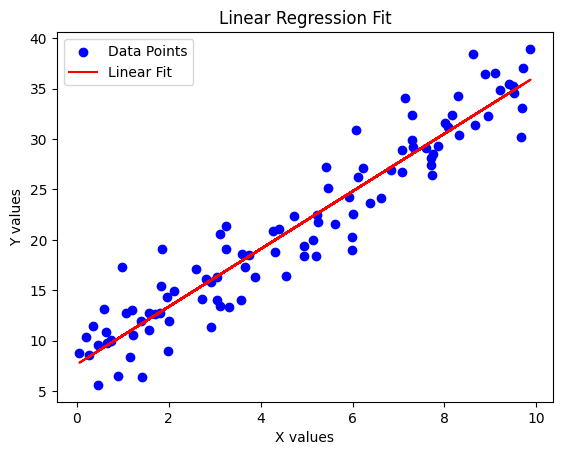

Slope (m): 2.86206803186309
Intercept (b): 7.645288472640251


In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Generate synthetic data
np.random.seed(42)
X = np.random.rand(100, 1) * 10  # Feature values
y = 3 * X + 7 + np.random.randn(100, 1) * 3  # y = 3X + 7 + noise

# Create and fit the model
model = LinearRegression()
model.fit(X, y)

# Predictions
y_pred = model.predict(X)

# Plot results
plt.scatter(X, y, color="blue", label="Data Points")
plt.plot(X, y_pred, color="red", label="Linear Fit")
plt.xlabel("X values")
plt.ylabel("Y values")
plt.title("Linear Regression Fit")
plt.legend()
plt.show()

# Print slope and intercept
print("Slope (m):", model.coef_[0][0])
print("Intercept (b):", model.intercept_[0])


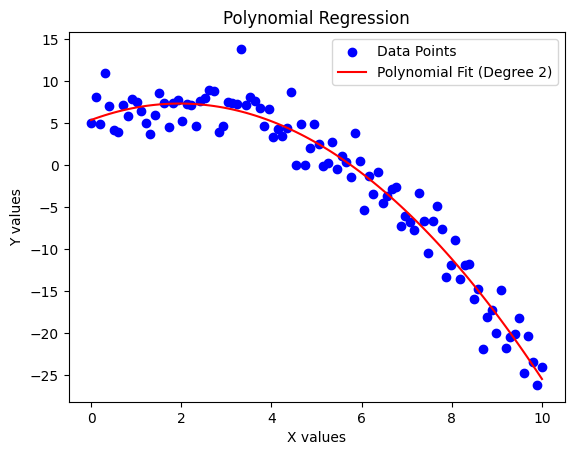

In [8]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# Generate synthetic data (quadratic relationship)
X = np.linspace(0, 10, 100).reshape(-1, 1)
y = 5 + 2 * X - 0.5 * X**2 + np.random.randn(100, 1) * 2  # Quadratic equation with noise

# Fit a polynomial regression model
degree = 2  # Quadratic
poly_model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
poly_model.fit(X, y)

# Predictions
y_pred = poly_model.predict(X)

# Plot results
plt.scatter(X, y, color="blue", label="Data Points")
plt.plot(X, y_pred, color="red", label=f"Polynomial Fit (Degree {degree})")
plt.xlabel("X values")
plt.ylabel("Y values")
plt.title("Polynomial Regression")
plt.legend()
plt.show()
